<a href="https://colab.research.google.com/github/Baldunica/neural/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22dl_image_dataset_loading_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

In [ ]:
!git clone https://github.com/Baldunica/neural.git;

Cloning into 'neural'...
remote: Enumerating objects: 30627, done.
remote: Total 30627 (delta 0), reused 0 (delta 0), pack-reused 30627
Receiving objects: 100% (30627/30627), 1.28 GiB | 33.92 MiB/s, done.
Checking out files: 100% (15338/15338), done.


In [ ]:
batch_size = 256;
image_size = (200,200);

In [ ]:
train_dataset = image_dataset_from_directory('neural/train',
subset = 'training',seed = 42, validation_split = 0.1,batch_size = batch_size,image_size = image_size);

Found 14932 files belonging to 4 classes.
Using 13439 files for training.


In [ ]:
validation_dataset = image_dataset_from_directory('neural/train', subset = 'validation', seed = 42, validation_split = 0.1, batch_size = batch_size,image_size = image_size)

Found 14932 files belonging to 4 classes.
Using 1493 files for validation.


In [ ]:
class_names = train_dataset.class_names
class_names

['broadleaf', 'grass', 'soil', 'soybean']

In [ ]:
test_dataset = image_dataset_from_directory('neural/test',batch_size = batch_size,image_size = image_size)

Found 404 files belonging to 4 classes.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size = AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size = AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size = AUTOTUNE)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(200, 200, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=2)

Epoch 1/5


In [ ]:
scores = model.evaluate(test_dataset, verbose=1)

2/2 [==============================] - 1s 818ms/step - loss: 0.6407 - accuracy: 0.7401


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 74.0099


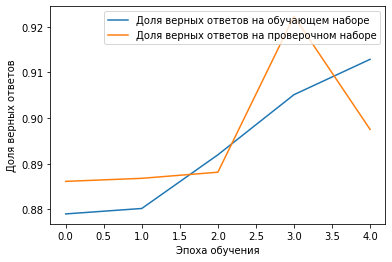

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

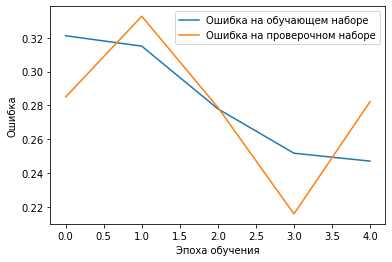

In [ ]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model.save("neural_model")

NameError: ignored

In [ ]:
files.download("neural_model")